In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier

from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import xgboost
from xgboost import XGBClassifier

from numpy import loadtxt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
data1 = pd.read_csv('C:/Users/pabas/Desktop/Machine Learning Project 01/Project5/CVD_cleaned_Over_Sampling.csv')

In [16]:
data1.shape

(198290, 19)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198290 entries, 0 to 198289
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                198290 non-null  object 
 1   Checkup                       198290 non-null  object 
 2   Exercise                      198290 non-null  object 
 3   Skin_Cancer                   198290 non-null  object 
 4   Other_Cancer                  198290 non-null  object 
 5   Depression                    198290 non-null  object 
 6   Diabetes                      198290 non-null  object 
 7   Arthritis                     198290 non-null  object 
 8   Sex                           198290 non-null  object 
 9   Age_Category                  198290 non-null  object 
 10  Height_(cm)                   198290 non-null  int64  
 11  Weight_(kg)                   198290 non-null  float64
 12  BMI                           198290 non-nul

In [5]:
data1.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,198290.000000,198290.000000,198290.000000,198290.000000,198290.000000,198290.000000,198290.000000
mean,170.849644,84.922764,29.002042,4.682581,29.009320,14.589142,6.156085
std,10.664331,21.541352,6.572486,8.257350,24.639082,14.515923,8.527821
min,91.000000,25.400000,12.110000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,69.850000,24.410000,0.000000,12.000000,4.000000,1.000000
50%,170.000000,81.650000,27.960000,0.000000,30.000000,12.000000,4.000000
75%,178.000000,96.620000,32.280000,5.000000,30.000000,20.000000,8.000000
max,234.000000,293.020000,98.440000,30.000000,120.000000,124.000000,128.000000


In [6]:
data1.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Heart_Disease                   0
dtype: int64

In [7]:
covariance_matrix = data1.cov()
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
                              Height_(cm)  Weight_(kg)         BMI  \
Height_(cm)                    113.727949   108.669445   -1.911946   
Weight_(kg)                    108.669445   464.029834  121.656128   
BMI                             -1.911946   121.656128   43.197569   
Alcohol_Consumption             11.369271    -5.673251   -5.856420   
Fruit_Consumption              -11.590513   -41.214688  -10.124336   
Green_Vegetables_Consumption    -2.575404   -19.277108   -5.831842   
FriedPotato_Consumption          9.663141    17.139889    2.558310   

                              Alcohol_Consumption  Fruit_Consumption  \
Height_(cm)                             11.369271         -11.590513   
Weight_(kg)                             -5.673251         -41.214688   
BMI                                     -5.856420         -10.124336   
Alcohol_Consumption                     68.183834          -2.059098   
Fruit_Consumption                       -2.059098         60

The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


In [19]:
data1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
198285    False
198286    False
198287    False
198288    False
198289    False
Length: 198290, dtype: bool

In [20]:
from sklearn.cluster import KMeans

In [77]:
clustering1 = KMeans(n_clusters=5)

In [78]:
clustering1.fit(data2)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KMeans(n_clusters=5)

In [79]:
labels=clustering1.predict(data2)

In [80]:
print(labels)

[4 3 4 ... 2 3 2]


In [74]:
centroid1=clustering1.cluster_centers_

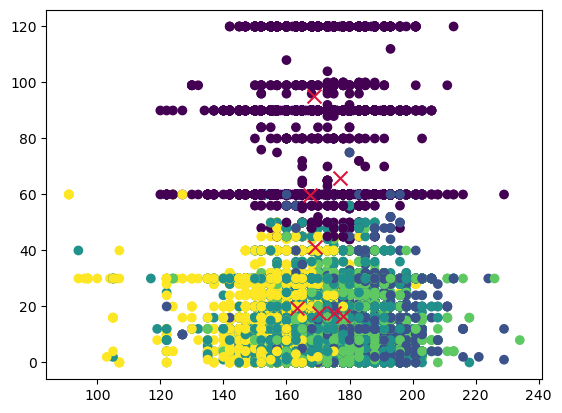

In [81]:
plt.scatter(data2.iloc[:, 0],data2.iloc[:, 4], c=labels)
plt.scatter(centroid1[:, 0], centroid1[:, 4],marker='x', s=100, c='crimson')
plt.show()

In [8]:
correlation_matrix = data1.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                              Height_(cm)  Weight_(kg)       BMI  \
Height_(cm)                      1.000000     0.473043 -0.027278   
Weight_(kg)                      0.473043     1.000000  0.859273   
BMI                             -0.027278     0.859273  1.000000   
Alcohol_Consumption              0.129110    -0.031895 -0.107910   
Fruit_Consumption               -0.044111    -0.077652 -0.062519   
Green_Vegetables_Consumption    -0.016637    -0.061649 -0.061127   
FriedPotato_Consumption          0.106254     0.093303  0.045644   

                              Alcohol_Consumption  Fruit_Consumption  \
Height_(cm)                              0.129110          -0.044111   
Weight_(kg)                             -0.031895          -0.077652   
BMI                                     -0.107910          -0.062519   
Alcohol_Consumption                      1.000000          -0.010121   
Fruit_Consumption                       -0.010121           1.000000   
Gr

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


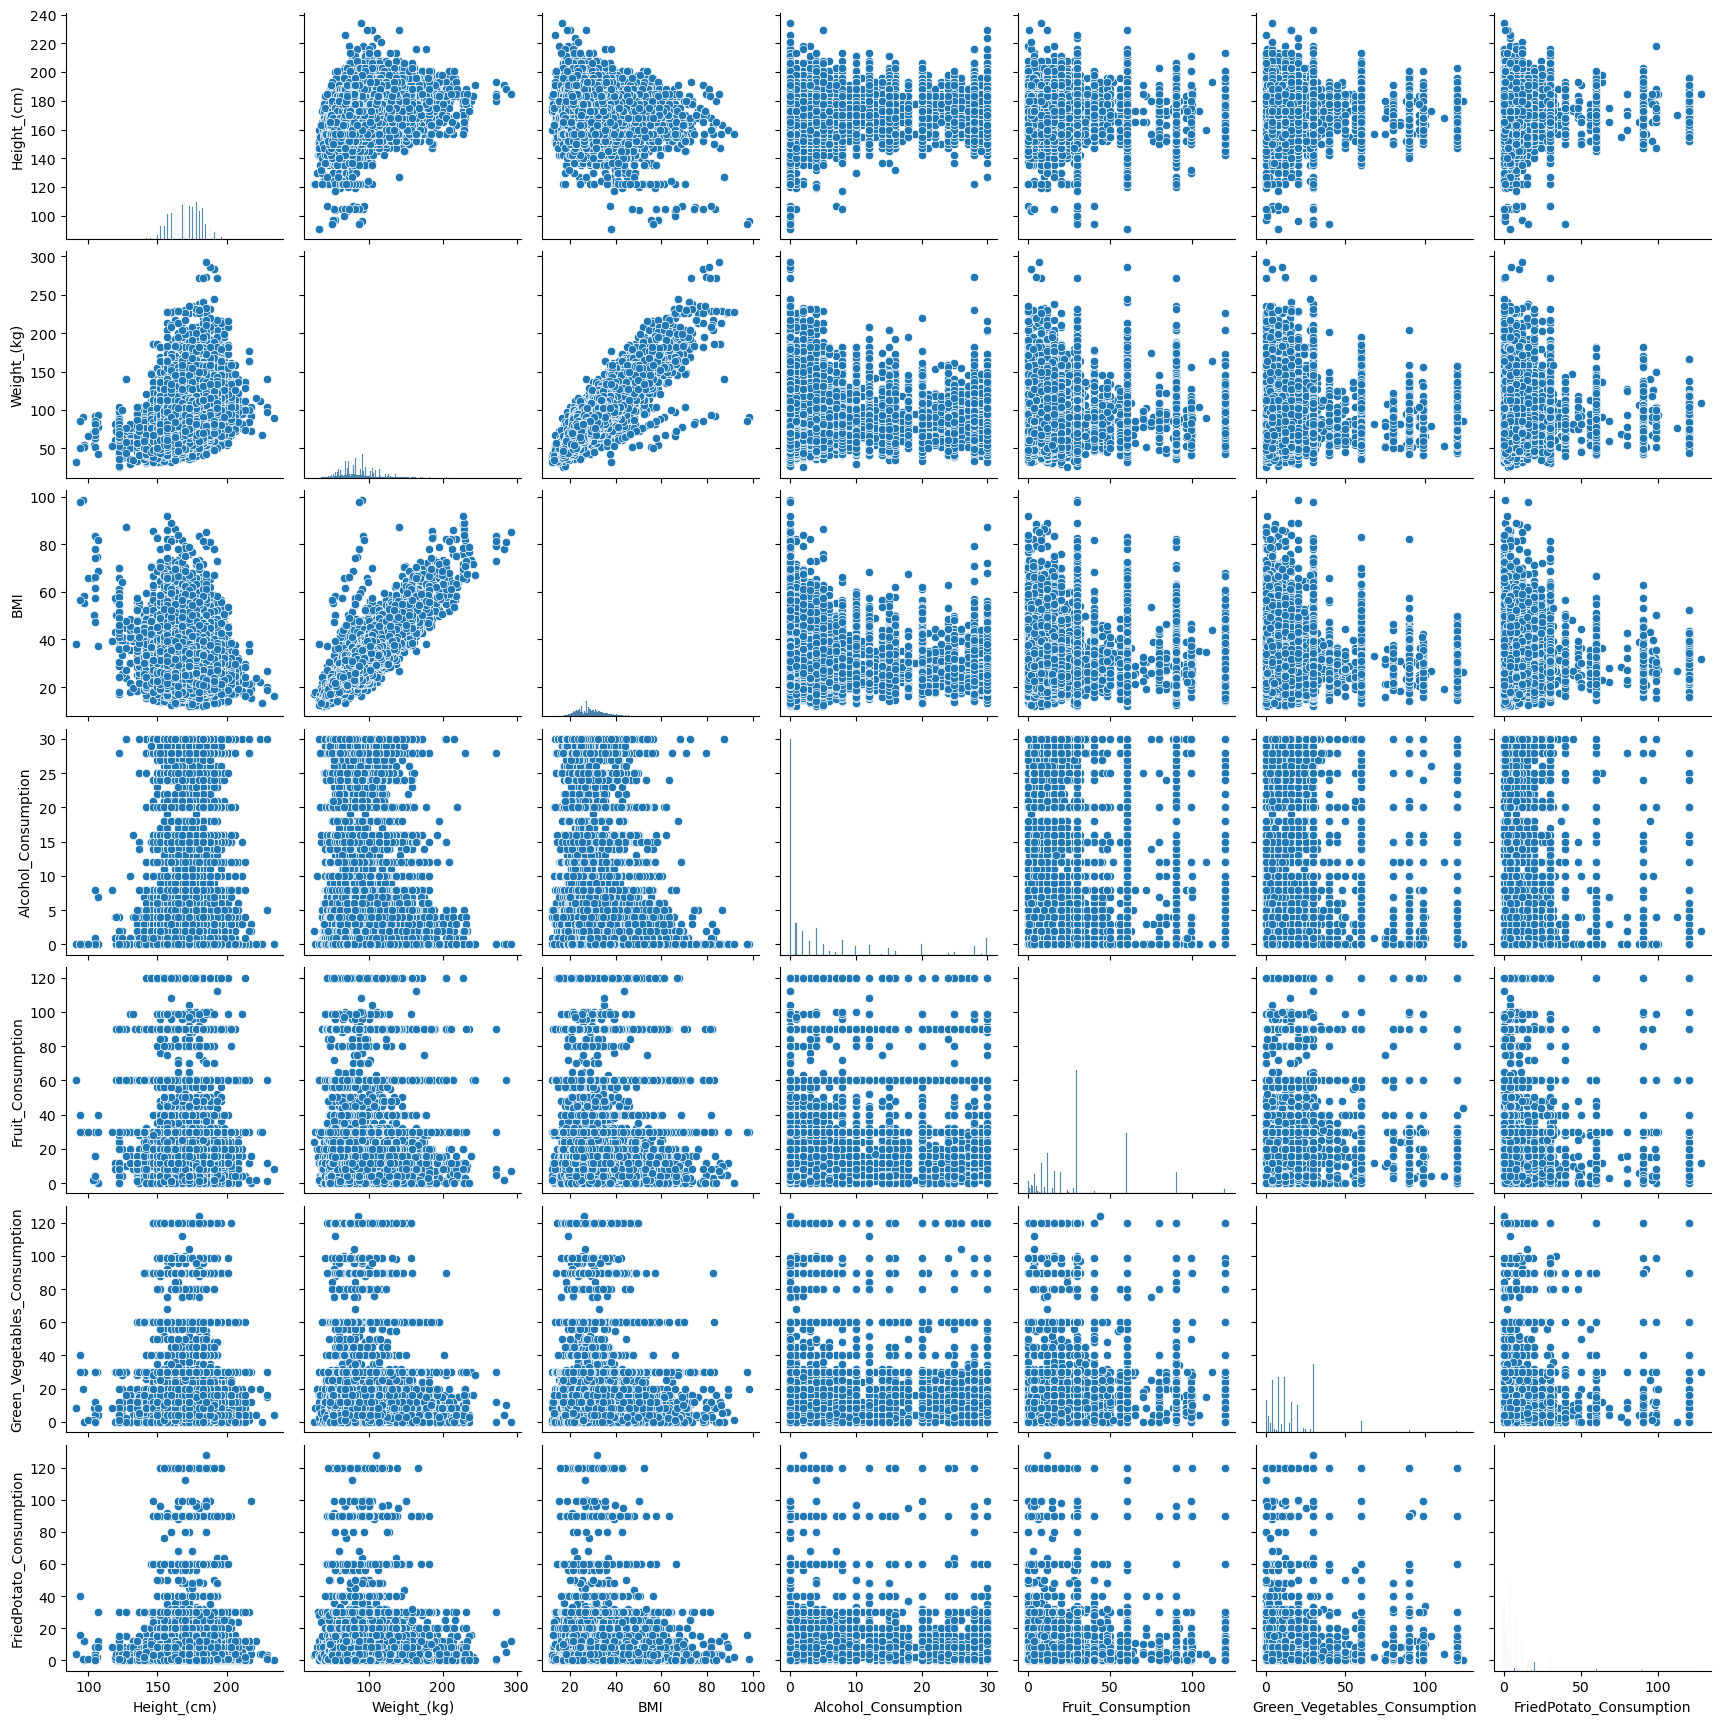

In [9]:
sb.pairplot(data1)
plt.show()

In [4]:
columns_to_extract = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                      'Fruit_Consumption', 'Green_Vegetables_Consumption',
                      'FriedPotato_Consumption', 'Heart_Disease'
                      ,'Age_Category','General_Health']

In [5]:
data2 = data1[columns_to_extract].copy()

data2['Heart_Disease']=data2['Heart_Disease'].map({"Yes":1,"No":0})





data2['Age_Category']=data2['Age_Category'].map({"18-24":20,"25-29":25,"30-34":30,"35-39":35,"40-44":40
                                                ,"45-49":45,"50-54":50,"55-59":55,"60-64":60,"65-69":65
                                                ,"70-74":70,"75-79":75,"80+":80})
data2['General_Health']=data2['General_Health'].map({"Poor":1,"Fair":2,"Good":3,"Very Good":4,"Excellent":5})

data2.head()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease,Age_Category,General_Health
0,165,77.11,28.29,0,30,0,4,1,70,4
1,180,93.44,28.73,0,30,30,8,1,75,1
2,175,69.85,22.74,0,16,8,0,1,60,2
3,160,74.84,29.23,0,30,20,2,1,75,2
4,175,73.48,23.92,0,2,8,30,1,75,2


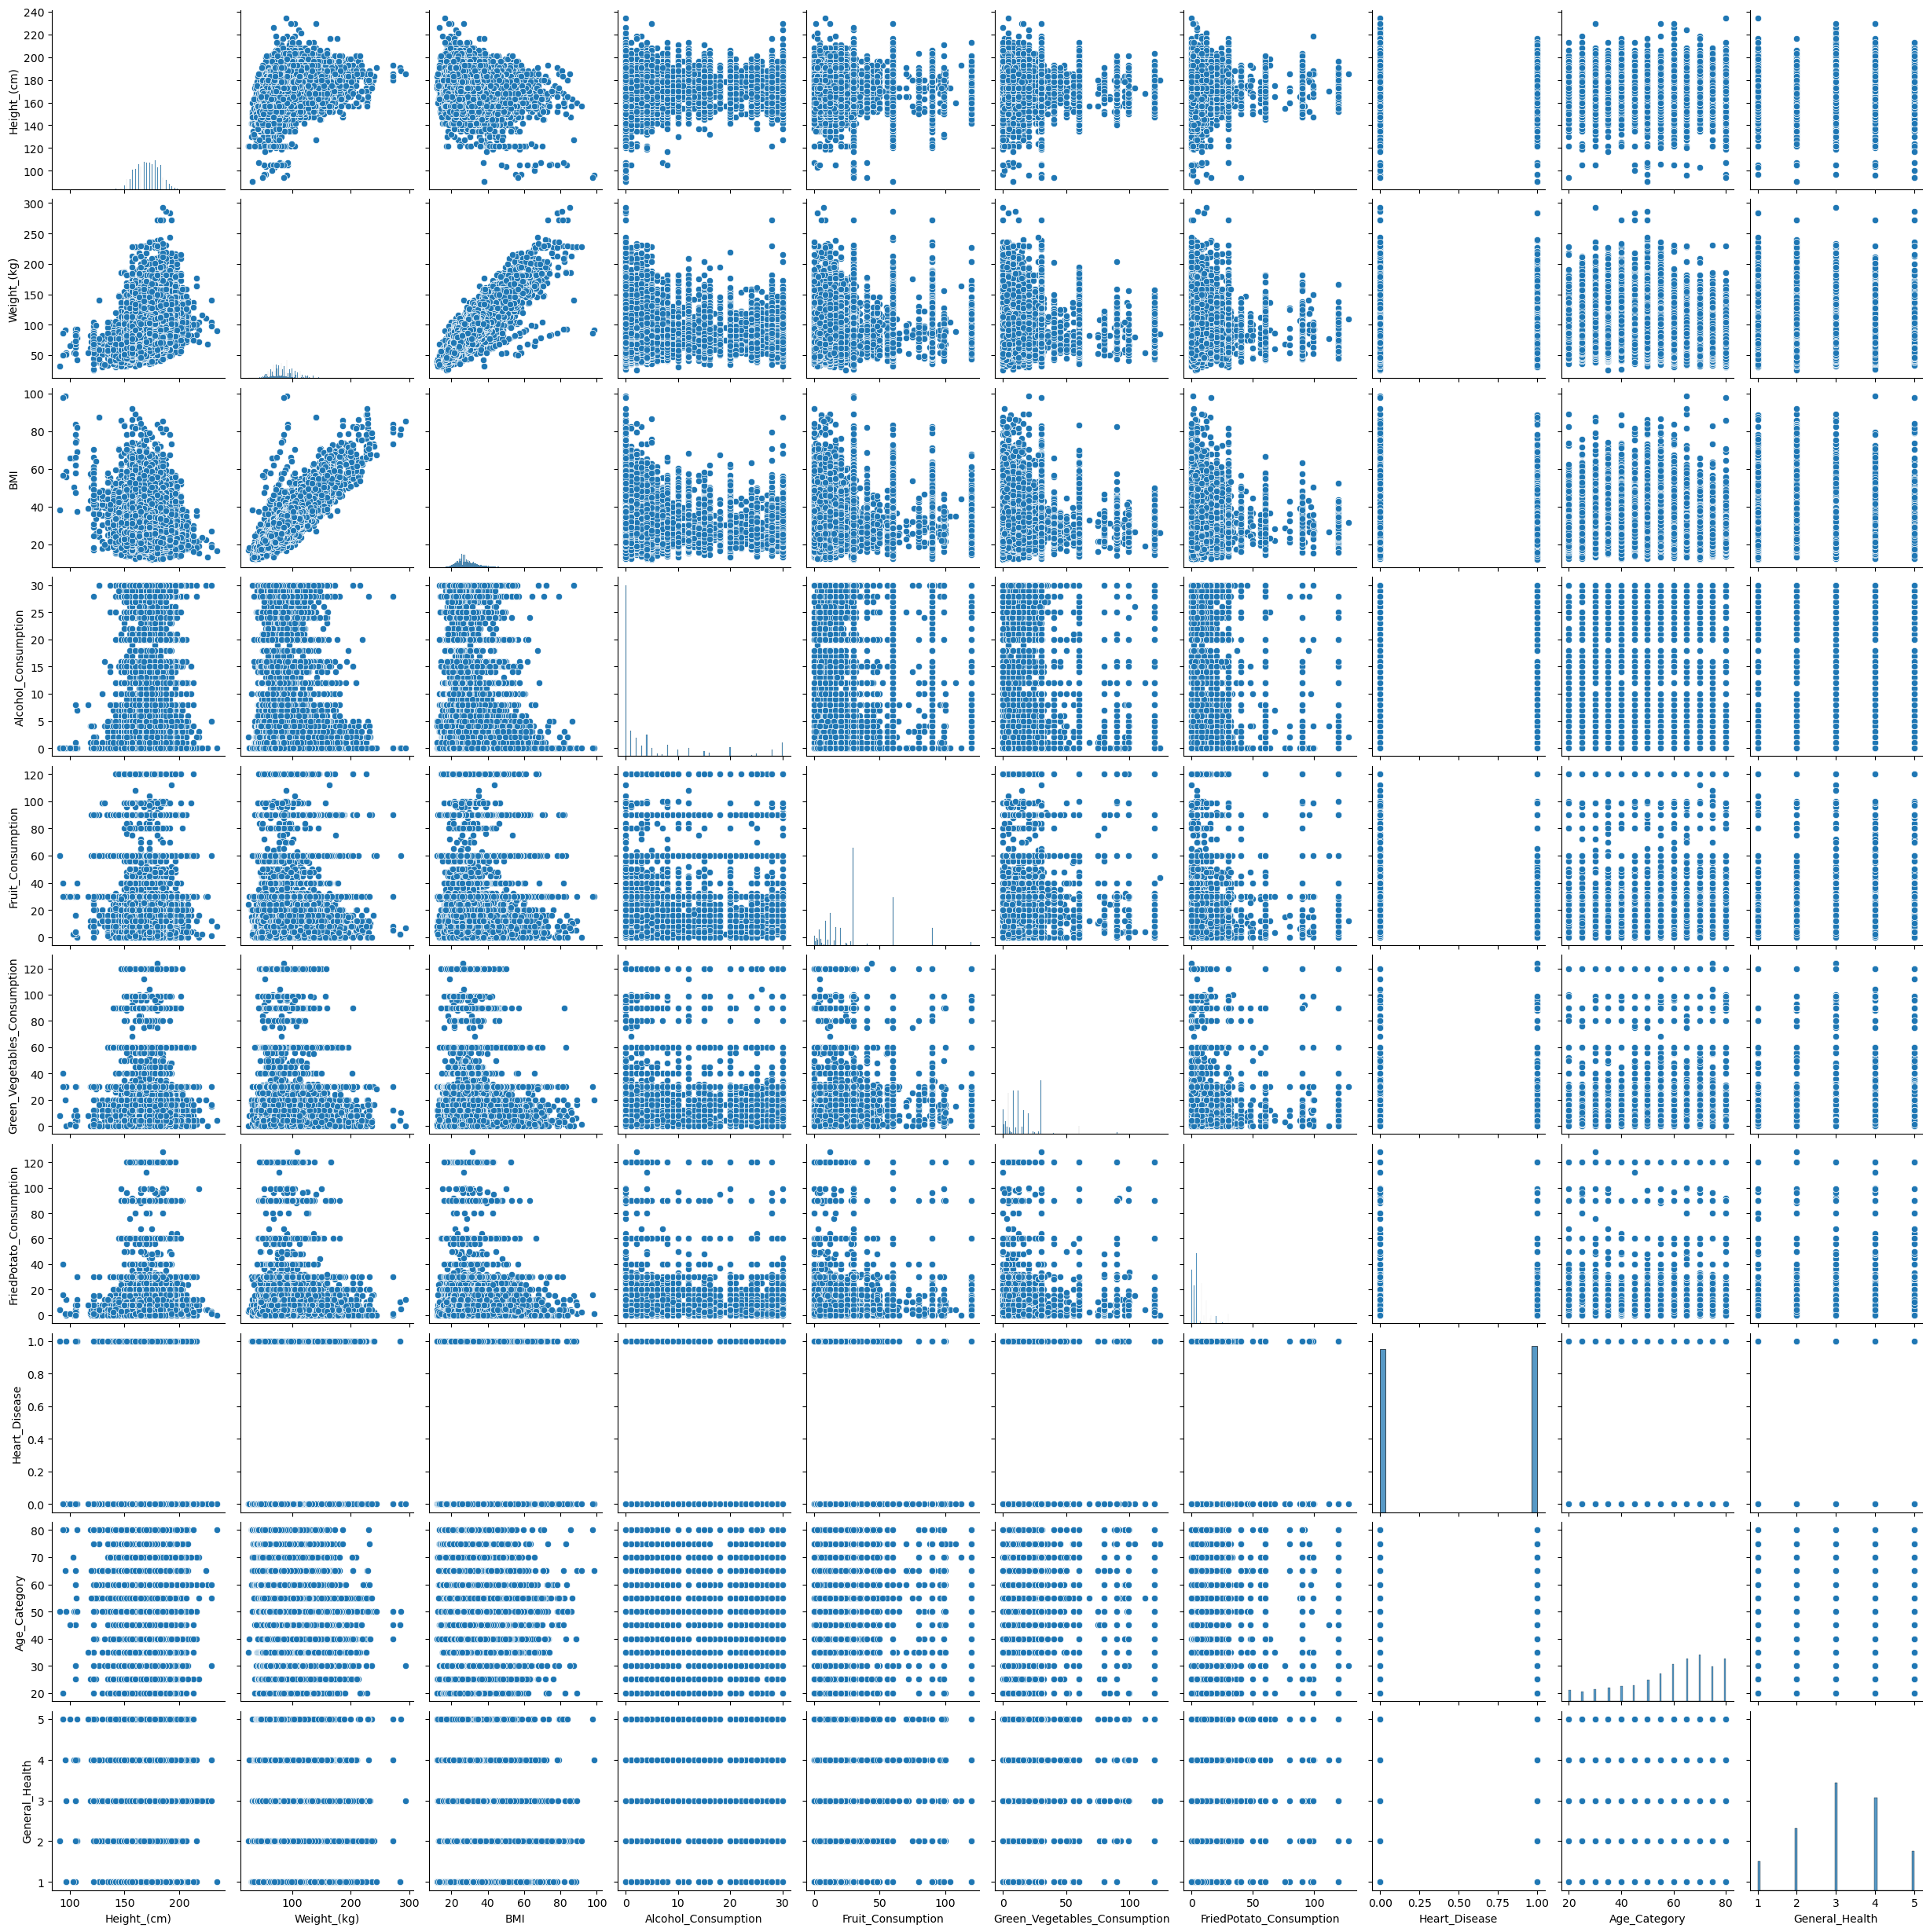

In [36]:
sb.pairplot(data2)
plt.show()

In [37]:
data2.cov()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease,Age_Category,General_Health
Height_(cm),113.727949,108.669445,-1.911946,11.369271,-11.590513,-2.575404,9.663141,0.167584,-14.769776,0.740509
Weight_(kg),108.669445,464.029834,121.656128,-5.673251,-41.214688,-19.277108,17.139889,0.990948,-25.266101,-3.875989
BMI,-1.911946,121.656128,43.197569,-5.856420,-10.124336,-5.831842,2.558310,0.283329,-4.014921,-1.592716
Alcohol_Consumption,11.369271,-5.673251,-5.856420,68.183834,-2.059098,7.299251,1.130593,-0.300848,-2.877305,1.365907
Fruit_Consumption,-11.590513,-41.214688,-10.124336,-2.059098,607.084371,95.498319,-11.053848,-0.431284,10.038011,2.726905
Green_Vegetables_Consumption,-2.575404,-19.277108,-5.831842,7.299251,95.498319,210.712025,0.842735,-0.346937,0.774765,2.075697
FriedPotato_Consumption,9.663141,17.139889,2.558310,1.130593,-11.053848,0.842735,72.723727,-0.063717,-17.015591,-0.208684
Heart_Disease,0.167584,0.990948,0.283329,-0.300848,-0.431284,-0.346937,-0.063717,0.249987,3.664400,-0.219829
Age_Category,-14.769776,-25.266101,-4.014921,-2.877305,10.038011,0.774765,-17.015591,3.664400,277.664724,-4.141488
General_Health,0.740509,-3.875989,-1.592716,1.365907,2.726905,2.075697,-0.208684,-0.219829,-4.141488,1.264121


In [38]:
data2.corr()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease,Age_Category,General_Health
Height_(cm),1.000000,0.473043,-0.027278,0.129110,-0.044111,-0.016637,0.106254,0.031430,-0.083115,0.061759
Weight_(kg),0.473043,1.000000,0.859273,-0.031895,-0.077652,-0.061649,0.093303,0.092007,-0.070389,-0.160035
BMI,-0.027278,0.859273,1.000000,-0.107910,-0.062519,-0.061127,0.045644,0.086219,-0.036660,-0.215533
Alcohol_Consumption,0.129110,-0.031895,-0.107910,1.000000,-0.010121,0.060897,0.016056,-0.072870,-0.020911,0.147125
Fruit_Consumption,-0.044111,-0.077652,-0.062519,-0.010121,1.000000,0.267009,-0.052608,-0.035009,0.024449,0.098435
Green_Vegetables_Consumption,-0.016637,-0.061649,-0.061127,0.060897,0.267009,1.000000,0.006808,-0.047802,0.003203,0.127182
FriedPotato_Consumption,0.106254,0.093303,0.045644,0.016056,-0.052608,0.006808,1.000000,-0.014944,-0.119743,-0.021765
Heart_Disease,0.031430,0.092007,0.086219,-0.072870,-0.035009,-0.047802,-0.014944,1.000000,0.439829,-0.391049
Age_Category,-0.083115,-0.070389,-0.036660,-0.020911,0.024449,0.003203,-0.119743,0.439829,1.000000,-0.221056
General_Health,0.061759,-0.160035,-0.215533,0.147125,0.098435,0.127182,-0.021765,-0.391049,-0.221056,1.000000


In [6]:
y = data2['Heart_Disease']
x = data2.drop(columns=['Heart_Disease'])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42,stratify=y)

In [8]:
knn1=KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)

In [9]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_predict=knn1.predict(x_test)

In [11]:
print(knn1.score(x_test,y_test))

0.7915174744061728


In [12]:
gnb1=GaussianNB()

In [13]:
y_pred=gnb1.fit(x_train,y_train).predict(x_test)

In [14]:
print(gnb1.score(x_test,y_test))

0.736934120059845


In [15]:
print(confusion_matrix(y_test,y_pred))

[[19866  9656]
 [ 5993 23972]]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72     29522
           1       0.71      0.80      0.75     29965

    accuracy                           0.74     59487
   macro avg       0.74      0.74      0.74     59487
weighted avg       0.74      0.74      0.74     59487



In [17]:
tree1=DecisionTreeClassifier()

In [18]:
tree1.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
pre1=tree1.predict(x_test)

In [20]:
from sklearn import metrics

In [21]:
metrics.accuracy_score(y_test, pre1)

0.8933044194529898

In [22]:
f1=x.columns

In [23]:
f1

Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'Age_Category', 'General_Health'],
      dtype='object')

In [24]:
list1=[]
for i in range(7):
    list1.append(f1[i])
list1

['Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption']

In [25]:
#plt.figure(figsize=(10,10), dpi=100)
#tree.plot_tree(tree1,feature_names=list1)
#plt.show()

In [26]:
RF1 =RandomForestRegressor(n_estimators=100,random_state=0)

In [27]:
RF1.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [28]:
pre1=RF1.predict(x_test)
RF1.score(x_test,y_test)

0.7265022601508202

In [29]:
RF2 =RandomForestClassifier(max_depth=4, oob_score=True)
RF2.fit(x_train,y_train)
print(RF2.score(x_test,y_test))
print(RF2.oob_score_)

0.7398086976986569
0.7382261190320094


In [30]:
y_pred=RF2.predict(x_test)

In [31]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[19992  9530]
 [ 5948 24017]]


In [32]:
Bag1=BaggingClassifier(n_estimators = 100, random_state = 22)
Bag1.fit(x_train,y_train)

BaggingClassifier(n_estimators=100, random_state=22)

In [33]:
Bag1.predict(x_test)

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [34]:
Bag1.score(x_test,y_test)

0.9075260140871114

In [35]:
Bag2=BaggingClassifier(n_estimators = 20, random_state = 22)
Bag2.fit(x_train,y_train)

BaggingClassifier(n_estimators=20, random_state=22)

In [39]:
pre3=Bag2.predict(x_test)

In [40]:
Bag2.score(x_test,y_test)

0.9092406744330694

In [41]:
cm=confusion_matrix(y_test,pre3)
print(cm)

[[24597  4925]
 [  474 29491]]


In [42]:
Ada1 = AdaBoostClassifier(n_estimators =100, learning_rate = 0.2).fit(x_train, y_train)
score = Ada1.score(x_test, y_test)

In [43]:
pre4=Ada1.predict(x_test)

In [44]:
score

0.7474238068821759

In [45]:
cm=confusion_matrix(y_test,pre4)
print(cm)

[[20871  8651]
 [ 6374 23591]]


In [46]:
from xgboost import XGBClassifier
xg1 = XGBClassifier(n_estimators = 1000, learning_rate = 0.05)
xg1.fit(x_train, y_train, early_stopping_rounds = 5, eval_set = [(x_test,y_test)], verbose=False)
score_xgb = xg1.score(x_test,y_test)

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


In [47]:
score_xgb

0.7732613848403853

In [48]:
pre5=xg1.predict(x_test)

In [49]:
cm=confusion_matrix(y_test,pre5)
print(cm)

[[21090  8432]
 [ 5056 24909]]


In [50]:
reg1 = LogisticRegression()

In [51]:
reg1.fit(x_train,y_train)

LogisticRegression()

In [52]:
pre2=reg1.predict(x_test)

In [53]:
cm=confusion_matrix(y_test,pre2)

In [54]:
print(cm)

[[20843  8679]
 [ 6506 23459]]


In [55]:
cm1=normalize(cm,norm='l1',axis=1)

In [56]:
print(cm1)

[[0.70601585 0.29398415]
 [0.21711997 0.78288003]]


In [57]:
score = reg1.score(x_test, y_test)

In [58]:
score

0.7447341435943988

### Feature Importance by applying Random Forest

In [59]:
RF1 =RandomForestRegressor(n_estimators=100,random_state=0)

In [60]:
RF1.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [61]:
RF1.feature_importances_

array([0.07146912, 0.11425709, 0.15264265, 0.06670404, 0.09360958,
       0.09656603, 0.08838492, 0.21018844, 0.10617814])

In [62]:
print(x.columns)

Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'Age_Category', 'General_Health'],
      dtype='object')


In [64]:
list1=[]
for i in range(9):
    list1.append(x.columns[i])
list1

['Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption',
 'Age_Category',
 'General_Health']

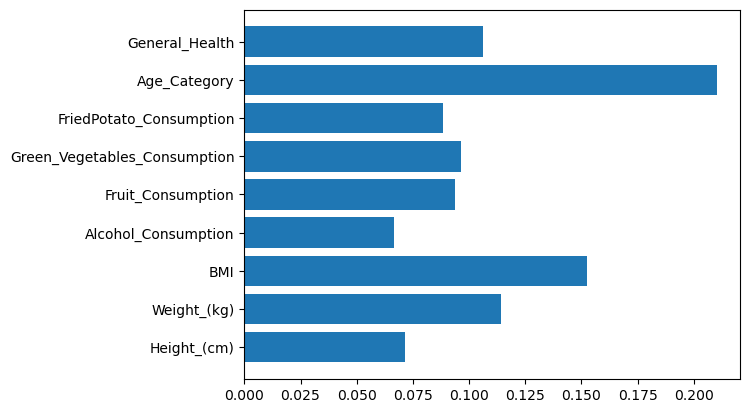

In [65]:
plt.barh(x.columns, RF1.feature_importances_)
plt.show()

### Neural Network with Keras

In [69]:
model3=Sequential()
model3.add(Dense(12, input_shape=(9,), activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(x,y, epochs=50, batch_size=40)

Epoch 1/50
4958/4958 [==============================] - 12s 2ms/step - loss: 0.5987 - accuracy: 0.7179
Epoch 2/50
4958/4958 [==============================] - 10s 2ms/step - loss: 0.5307 - accuracy: 0.7382
Epoch 3/50
4958/4958 [==============================] - 10s 2ms/step - loss: 0.5303 - accuracy: 0.7379
Epoch 4/50
4958/4958 [==============================] - 11s 2ms/step - loss: 0.5287 - accuracy: 0.7392
Epoch 5/50
4958/4958 [==============================] - 11s 2ms/step - loss: 0.5273 - accuracy: 0.7394
Epoch 6/50
4958/4958 [==============================] - 10s 2ms/step - loss: 0.5262 - accuracy: 0.7411
Epoch 7/50
4958/4958 [==============================] - 11s 2ms/step - loss: 0.5261 - accuracy: 0.7399
Epoch 8/50
4958/4958 [==============================] - 10s 2ms/step - loss: 0.5255 - accuracy: 0.7416
Epoch 9/50
4958/4958 [==============================] - 10s 2ms/step - loss: 0.5250 - accuracy: 0.7416
Epoch 10/50
4958/4958 [==============================] - 10s 2ms/step - l

In [70]:
_, accuracy = model3.evaluate(x,y)
print('Accuracy: %.2f' % (accuracy*100))

6197/6197 [==============================] - 11s 2ms/step - loss: 0.5173 - accuracy: 0.7468
Accuracy: 74.68
